In [1]:
## note these to add w/Poetry to the Dockerfile
%pip install pandas
%pip install networkx
%pip install scipy

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.spatial.distance import pdist
from tensorflow.keras.layers import Dense, Multiply, Add
from tensorflow.keras import Model
from tensorflow.keras.constraints import NonNeg 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [3]:
url = 'http://cs.bc.edu/~prudhome/AAPLD/animal-similarity.csv'

raw_dataset = pd.read_csv(url, index_col=0)
list_of_animal_pairs = raw_dataset.index.str.split('~')

In [4]:
animal_pair_data = pd.DataFrame.from_records(list_of_animal_pairs, columns=['first_animal', 'second_animal'], index= raw_dataset.index)

In [5]:
animal_pair_data.sort_values(by = ['first_animal', 'second_animal'], inplace=True)

In [6]:
unique_animals = set(animal_pair_data.first_animal).union(animal_pair_data.second_animal)

In [7]:
animal_pairs = nx.Graph()
animal_pairs.add_nodes_from(unique_animals)
animal_pairs.add_edges_from(list_of_animal_pairs)

In [8]:
low_degree=[k for k,v in animal_pairs.degree._nodes.items() if len(v) < 32]

In [9]:
animal_pairs.remove_nodes_from(low_degree)

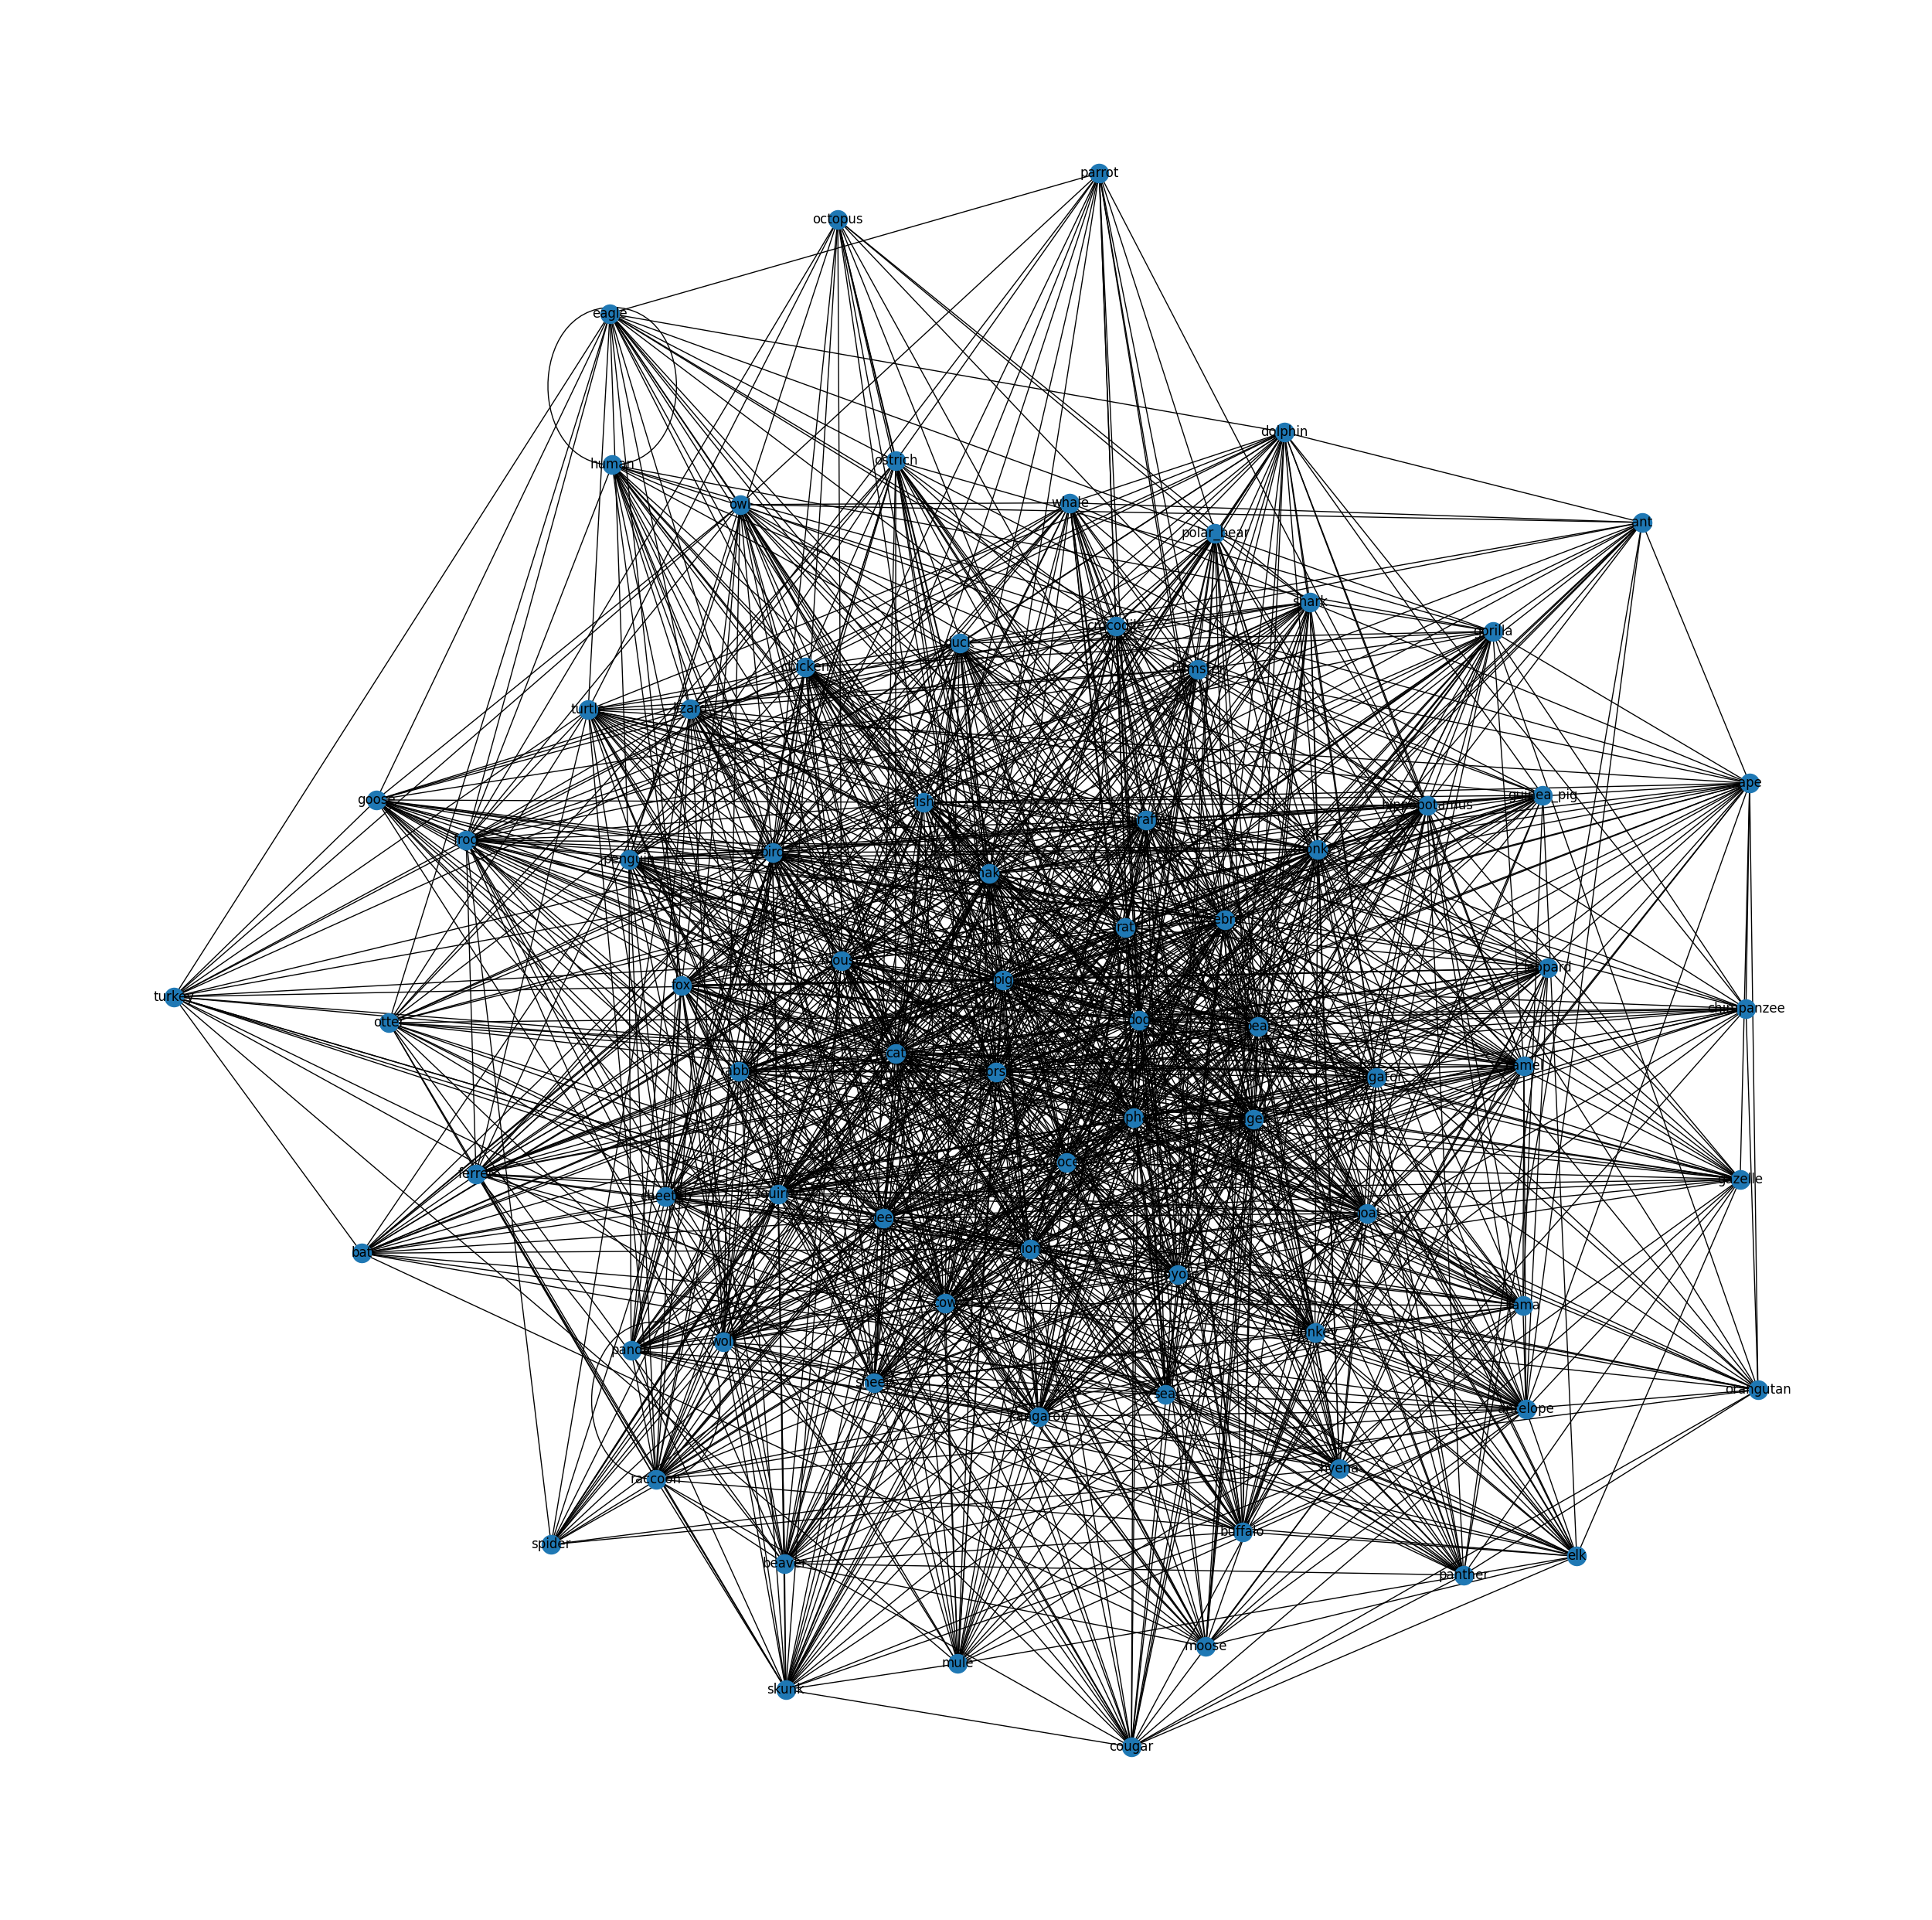

In [10]:
fig, ax = plt.subplots(figsize=(32,32))
nx.draw(animal_pairs, with_labels=True, ax=ax)

plt.show()

In [11]:
connected_list = [x for x in animal_pairs.nodes]

In [12]:
# try the small list, or, failing that, just the apes

In [13]:
smaller_animal_pair_data=animal_pair_data.loc[animal_pair_data['first_animal' ].isin( connected_list) & animal_pair_data['second_animal' ].isin( connected_list) ] 

In [14]:
joined_data=smaller_animal_pair_data.join(raw_dataset).drop(columns='[All_Ratings]')

In [15]:
big_matrix = pd.DataFrame(index=connected_list, columns = connected_list)

In [16]:
joined_data

first_animal second_animal  Average_Rating
Pair                                                         
alligator~antelope    alligator      antelope           1.940
alligator~bird        alligator          bird           2.080
alligator~buffalo     alligator       buffalo           1.080
alligator~elephant    alligator      elephant           1.140
alligator~fish        alligator          fish           1.000
...                         ...           ...             ...
zebra~seal                zebra          seal           1.040
zebra~shark               zebra         shark           1.067
zebra~snake               zebra         snake           1.880
zebra~tiger               zebra         tiger           2.720
zebra~turtle              zebra        turtle           1.120

[1601 rows x 3 columns]

In [17]:
#TODO wrap below section into functions

In [18]:
for row in joined_data.iterrows():
    big_matrix.loc[row[1].first_animal][row[1].second_animal] = row[1].Average_Rating
    big_matrix.loc[row[1].second_animal][row[1].first_animal] = row[1].Average_Rating

In [19]:
big_matrix = big_matrix.astype(float)

In [20]:
# big_matrix = big_matrix[big_matrix.isna().mean(1) < 0.5]
# big_matrix = big_matrix[big_matrix.index.to_list()]

In [21]:
big_matrix = big_matrix[big_matrix.isna().mean(1) < 0.33]

In [22]:
big_matrix = big_matrix[big_matrix.index.to_list()]

In [23]:
plt.matshow(big_matrix)

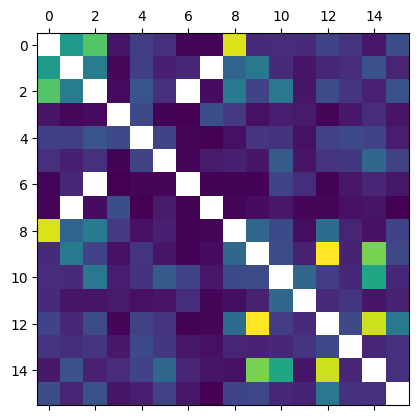

In [24]:
plt.show()

In [25]:
big_matrix.isna().mean(1)

horse       0.0625
cow         0.1250
deer        0.1250
snake       0.0625
bear        0.0625
pig         0.0625
bird        0.1250
fish        0.1250
zebra       0.0625
tiger       0.0625
dog         0.0625
monkey      0.0625
lion        0.0625
elephant    0.0625
cat         0.0625
giraffe     0.0625
dtype: float64

In [26]:
big_matrix.shape

(16, 16)

In [27]:
big_matrix

horse    cow  deer  snake   bear    pig  bird   fish  zebra  tiger  \
horse       NaN  3.860  4.82   1.30  1.960  1.720  1.08  1.100  5.917  1.620   
cow       3.860    NaN  3.22   1.11  1.960  1.460  1.58    NaN  2.700  3.117   
deer      4.820  3.220   NaN   1.16  2.360  1.700   NaN  1.180  3.180  2.040   
snake     1.300  1.110  1.16    NaN  2.160  1.060  1.00  2.260  1.880  1.240   
bear      1.960  1.960  2.36   2.16    NaN  2.080  1.10  1.000  1.240  1.780   
pig       1.720  1.460  1.70   1.06  2.080    NaN  1.10  1.370  1.460  1.320   
bird      1.080  1.580   NaN   1.00  1.100  1.100   NaN  1.060  1.060  1.060   
fish      1.100    NaN  1.18   2.26  1.000  1.370  1.06    NaN  1.080  1.180   
zebra     5.917  2.700  3.18   1.88  1.240  1.460  1.06  1.080    NaN  2.720   
tiger     1.620  3.117  2.04   1.24  1.780  1.320  1.06  1.180  2.720    NaN   
dog       1.660  1.620  3.06   1.42  1.760  2.480  2.05  1.340  2.175  2.200   
monkey    1.640  1.290  1.32   1.38  1.240  1.280  1.68  1.100  1.200  1.480   
lion      2.040  1.560  2.20   1.10  2.020  1.780  1.04  1.067  2.840  6.220   
elephant  1.800  1.683  1.80   1.36  2.160  1.840  1.34  1.240  1.550  1.500   
cat       1.360  2.300  1.48   1.66  2.080  2.717  1.56  1.300  1.260  5.160   
giraffe   2.250  1.540  2.30   1.30  1.425  2.020  1.34  1.020  2.040  2.125   

            dog  monkey   lion  elephant    cat  giraffe  
horse     1.660    1.64  2.040     1.800  1.360    2.250  
cow       1.620    1.29  1.560     1.683  2.300    1.540  
deer      3.060    1.32  2.200     1.800  1.480    2.300  
snake     1.420    1.38  1.100     1.360  1.660    1.300  
bear      1.760    1.24  2.020     2.160  2.080    1.425  
pig       2.480    1.28  1.780     1.840  2.717    2.020  
bird      2.050    1.68  1.040     1.340  1.560    1.340  
fish      1.340    1.10  1.067     1.240  1.300    1.020  
zebra     2.175    1.20  2.840     1.550  1.260    2.040  
tiger     2.200    1.48  6.220     1.500  5.160    2.125  
dog         NaN    2.72  1.940     1.600  4.080    1.600  
monkey    2.720     NaN  1.640     1.810  1.320    1.500  
lion      1.940    1.64    NaN     2.160  5.820    3.100  
elephant  1.600    1.81  2.160       NaN  1.560    1.740  
cat       4.080    1.32  5.820     1.560    NaN    1.700  
giraffe   1.600    1.50  3.100     1.740  1.700      NaN

In [28]:
# todo make into function
similarities = big_matrix.to_numpy()
similarity_vec = np.tril(similarities, -1)
similarity_vec = similarity_vec[np.nonzero(similarity_vec)]

In [29]:
# FIll in NA's 

In [30]:
similarity_vec = np.nan_to_num(similarity_vec, nan=min(similarity_vec))

In [31]:
dissimilarity_vec = np.exp(-1*similarity_vec)

In [32]:
len(dissimilarity_vec) 
# :=Y  = n(n-1)/2
# 2Y = n^2 - n
# 0 = n^2 - n - 2Y

# 0 = (n - 1/2) ^2 - 1/4 - 2Y 
# 2Y + 1/4 = (n - 1/2)^2
# N = 1/2 + sqrt(2Y + 1/4)


120

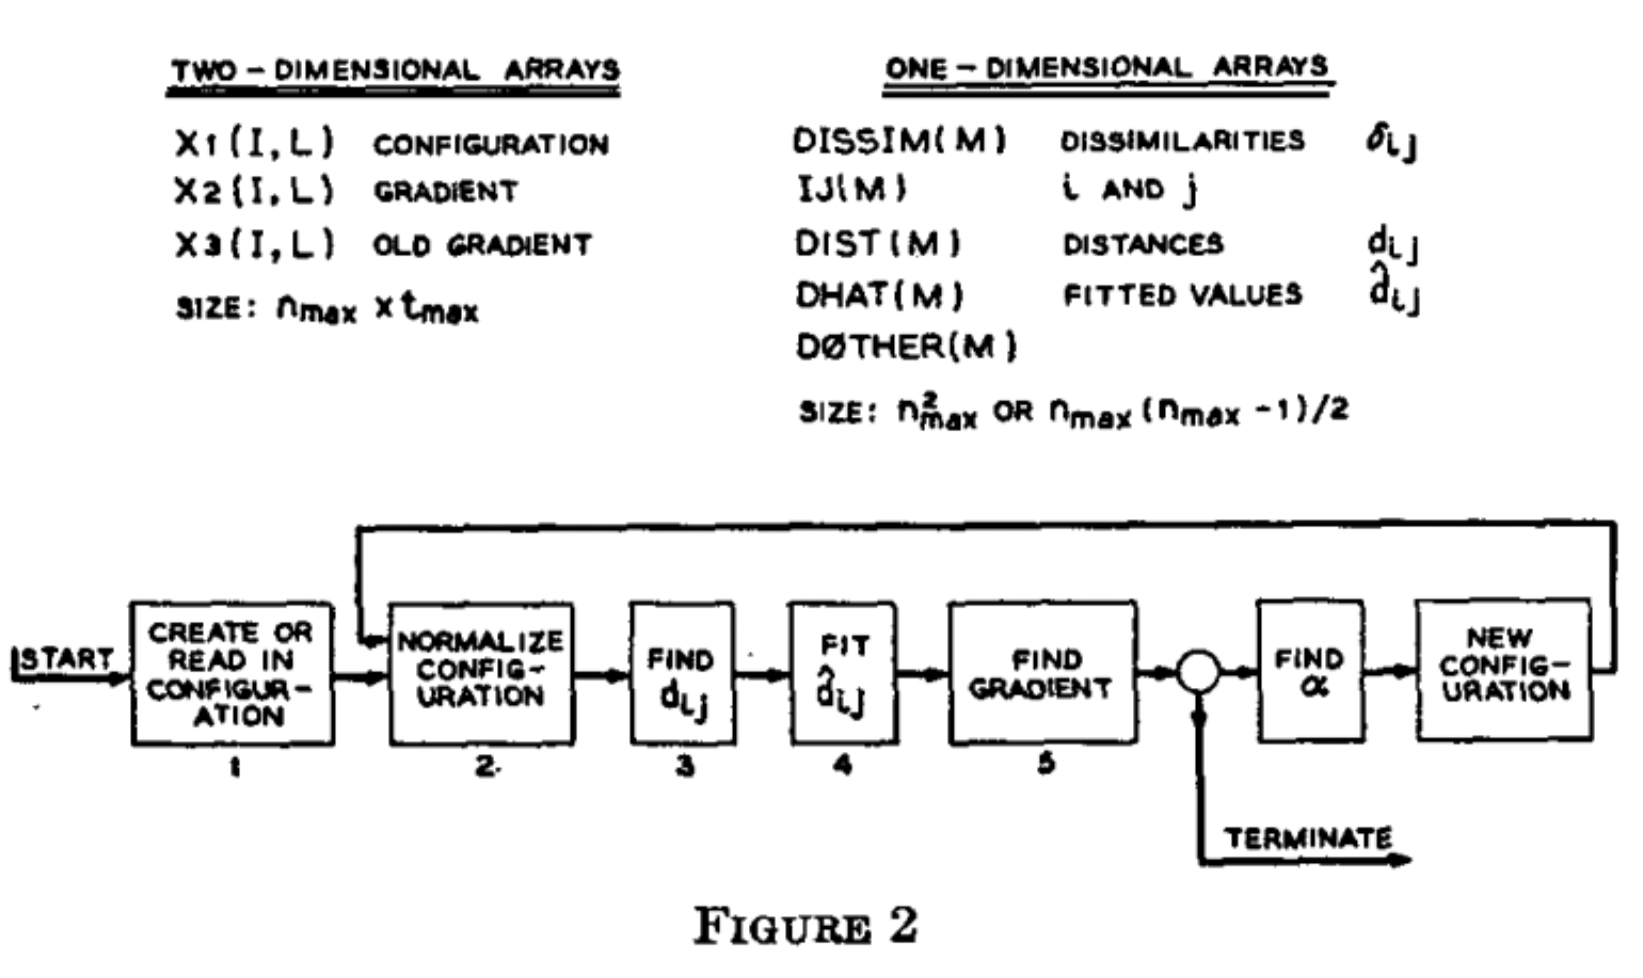
From Kruskal, 1964

Idea is to follow these steps, 

In [33]:
def generate_starting_configuration(dis_vec, n_points, dim=2):
    ## Generate kruskal_style t-dimensional starting configuration
    #  N = 1/2 + sqrt(2Y + 1/4)

    assert n_points == int(1/2 + np.sqrt(2*len(dis_vec) +1/4))
    
    max_multiplier = n_points//dim + 2
    #say 503 points in2 dim, then we need 252 diags, drop the last row of the last one , s0 have to go from 
    # 1 to n_points/dim +2
    starting_config = np.vstack([np.diag(j*np.ones(dim)) for j in range(1,max_multiplier)])
    return starting_config[:n_points,:]


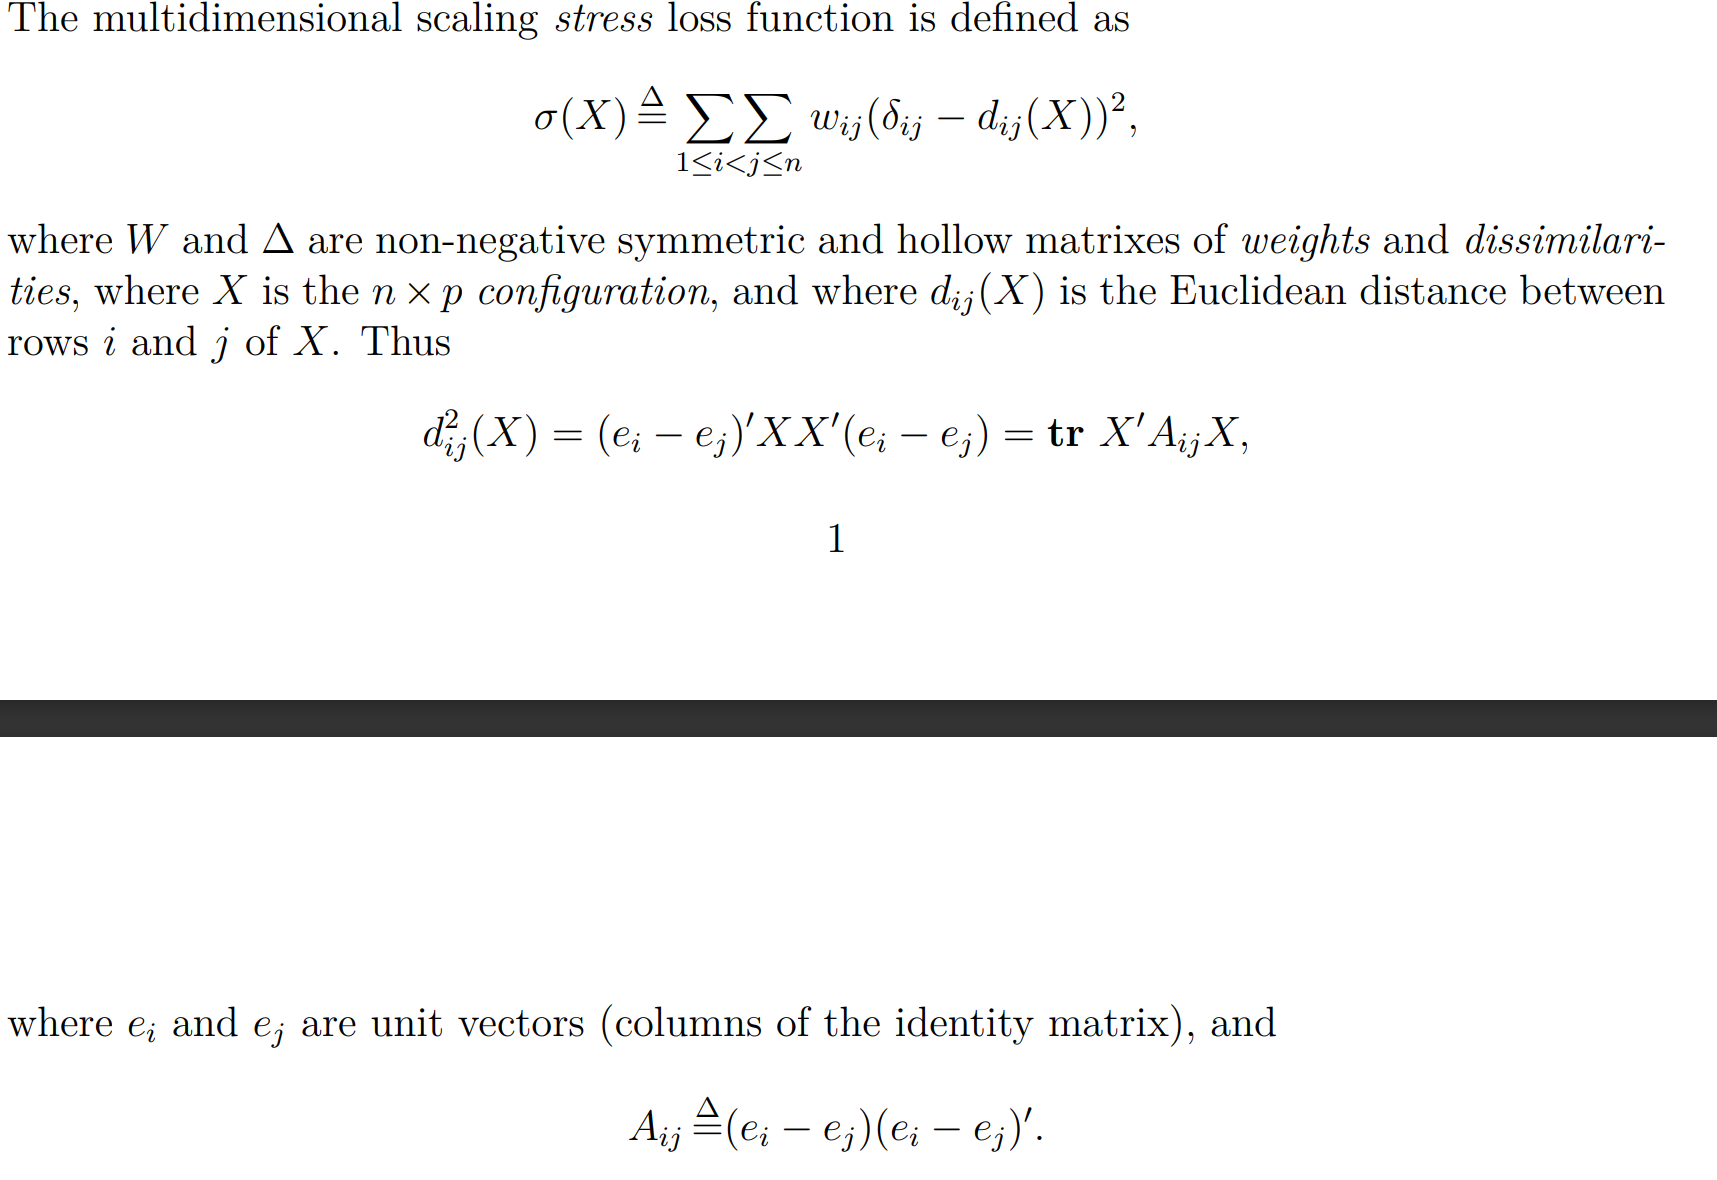
From https://jansweb.netlify.app/publication/deleeuw-e-18-c/
NB: $\delta_{ij}$ here is the true dissimilarity between $i$ and $j$ 

In [34]:
## TODO move to matrix_utils.py 
## MAYBE rewrite in pure tensorflow
### need config_dim 
### -> then apply np.outer on each to get Aij
##
def self_outer(basis_vector:tf.Tensor)->tf.Tensor:
    return tf.einsum('i,j->ij', basis_vector, basis_vector)
    

def all_pairwise_basis_diffs(max_index:int)->tf.Tensor:
  
    assert max_index > 1 ## ignore first basis vector  
    eye_ref = tf.eye(num_rows=max_index, num_columns=max_index)
    
    ## tensor with shape given by all pairs 
    output = tf.TensorArray(dtype=tf.float32, size=(max_index**2 - max_index)//2)
    idx = 0
    for upper_index in range(2, max_index):
        for lower_index in range(upper_index):
            diff = eye_ref[:,lower_index] - eye_ref[:,upper_index]
            output = output.write(idx, self_outer(diff))
            idx += 1
#                      np.apply_along_axis(func1d=self_outer, axis=0, arr=ei_minus_ejs)
    return output 
                     
### then apply func1d on Aijs 
def pairwise_dist_block_chunk(outer_distance:np.array, configuration:np.array):
    # Compute tr X'A_ij X 
    breakpoint()
    return tf.linalg.trace(tf.einsum('ij,jk->ik',tf.einsum('ij,jk->ik', tf.transpose(configuration), outer_distance),configuration))
    

def get_pairwise_distances(configuration:tf.Variable)->tf.Variable:
    number_obs = configuration.shape[0]
    number_dists = (number_obs**2 - number_obs)//2
    ## tensorarray with shape given by all pairs; this one is to hold the individual differences
    output = tf.TensorArray(dtype=tf.float32, size=number_dists)
    
    outerL = all_pairwise_basis_diffs(number_obs)
    
 
    ## loop over outerL and apply pairwise_dist_block_chunck
    for j in range(number_dists):
        output = output.write(j, pairwise_dist_block_chunk(outerL.read(j), configuration))
    return output.stack()



In [35]:
## todo move to pdistlayer.py
## convert to tensorflow
def tf_get_pw_dist(tensorconfig:tf.Tensor)->tf.Tensor:
    dhat = tf.expand_dims(tf.py_function(func = get_pairwise_distances, inp = [tensorconfig], Tout=tf.float64, name="pairwise_dist"),-1)
    return dhat

In [36]:
jh = tf.eye(3)
for x in range(1,3):
    for j in range(x):
        print(f"{x,j}")
        print(jh[x,j])
    pass

(1, 0)
tf.Tensor(0.0, shape=(), dtype=float32)
(2, 0)
tf.Tensor(0.0, shape=(), dtype=float32)
(2, 1)
tf.Tensor(0.0, shape=(), dtype=float32)


In [37]:
jh

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

In [38]:
## wrap pairwise distance in a layer
class PDistLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(PDistLayer, self).__init__()
        
    def call(self, inputs):
        return tf_get_pw_dist(inputs)

In [39]:
#todo move to mdsmodel.py
class MDSModel(Model):
    def __init__(self,configuration):
        super(MDSModel, self).__init__()
        self.config = tf.Variable(configuration)
    
        self.distance = PDistLayer()
        self.d1 = Dense(128, activation='relu', kernel_constraint=NonNeg())
        self.d2 = Dense(1, activation='relu', kernel_constraint=NonNeg())

    def call(self, x):
        #nb we are throwing away x here 
        x = Multiply()([tf.ones_like(self.config), self.config])
        x = self.distance(x)
        x = self.d1(x)
        x = self.d2(x)
        return x

# Create an instance of the model


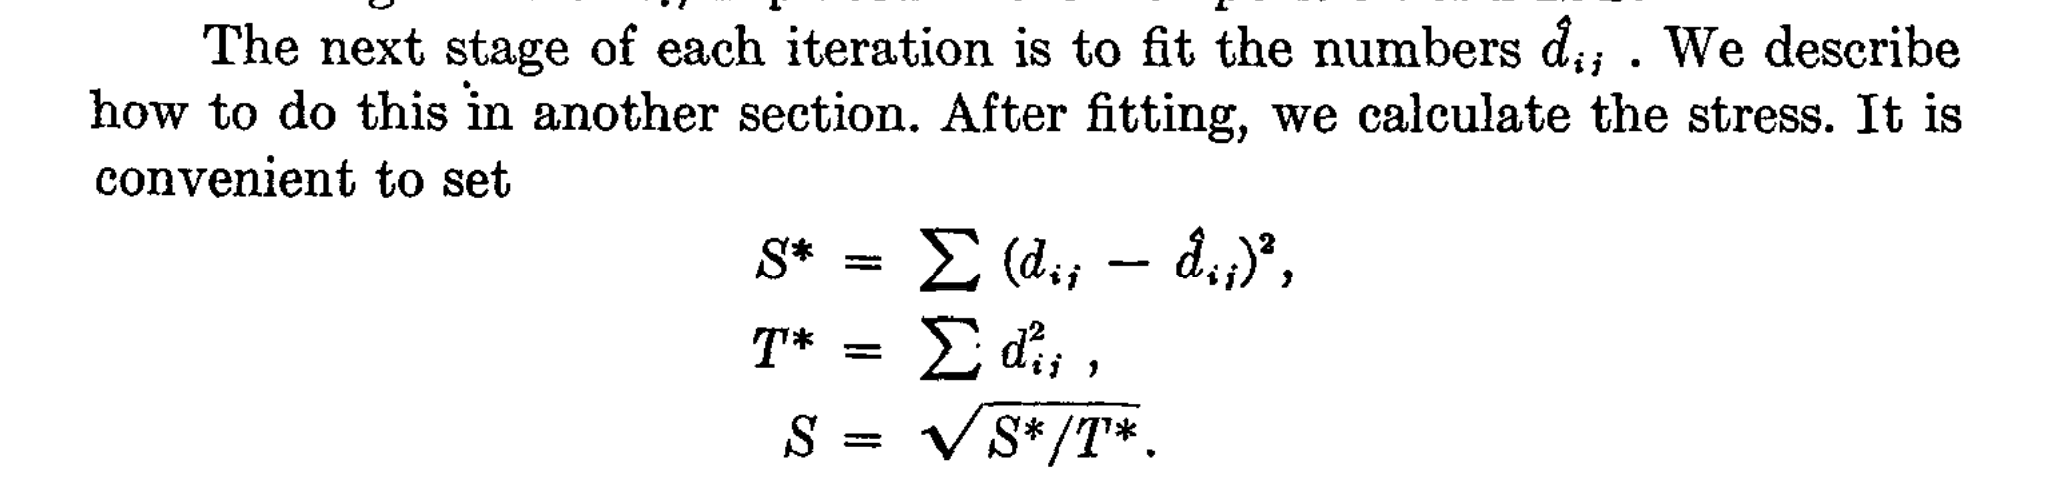
Stress Loss function from Kruskal, 1964

In [40]:
def stress(y_true, y_pred):
    Sstar = tf.math.reduce_sum(tf.math.square(y_true - y_pred),axis=-1)
    Tstar = tf.math.reduce_sum(tf.square(y_true),axis=-1)
    S = tf.math.sqrt(tf.math.divide_no_nan(Sstar,Tstar))
    return S  # Note the `axis=-1`



In [41]:
stress(tf.constant((1,3,3.)), tf.constant((6.,4,2)))

<tf.Tensor: shape=(), dtype=float32, numpy=1.1920791>

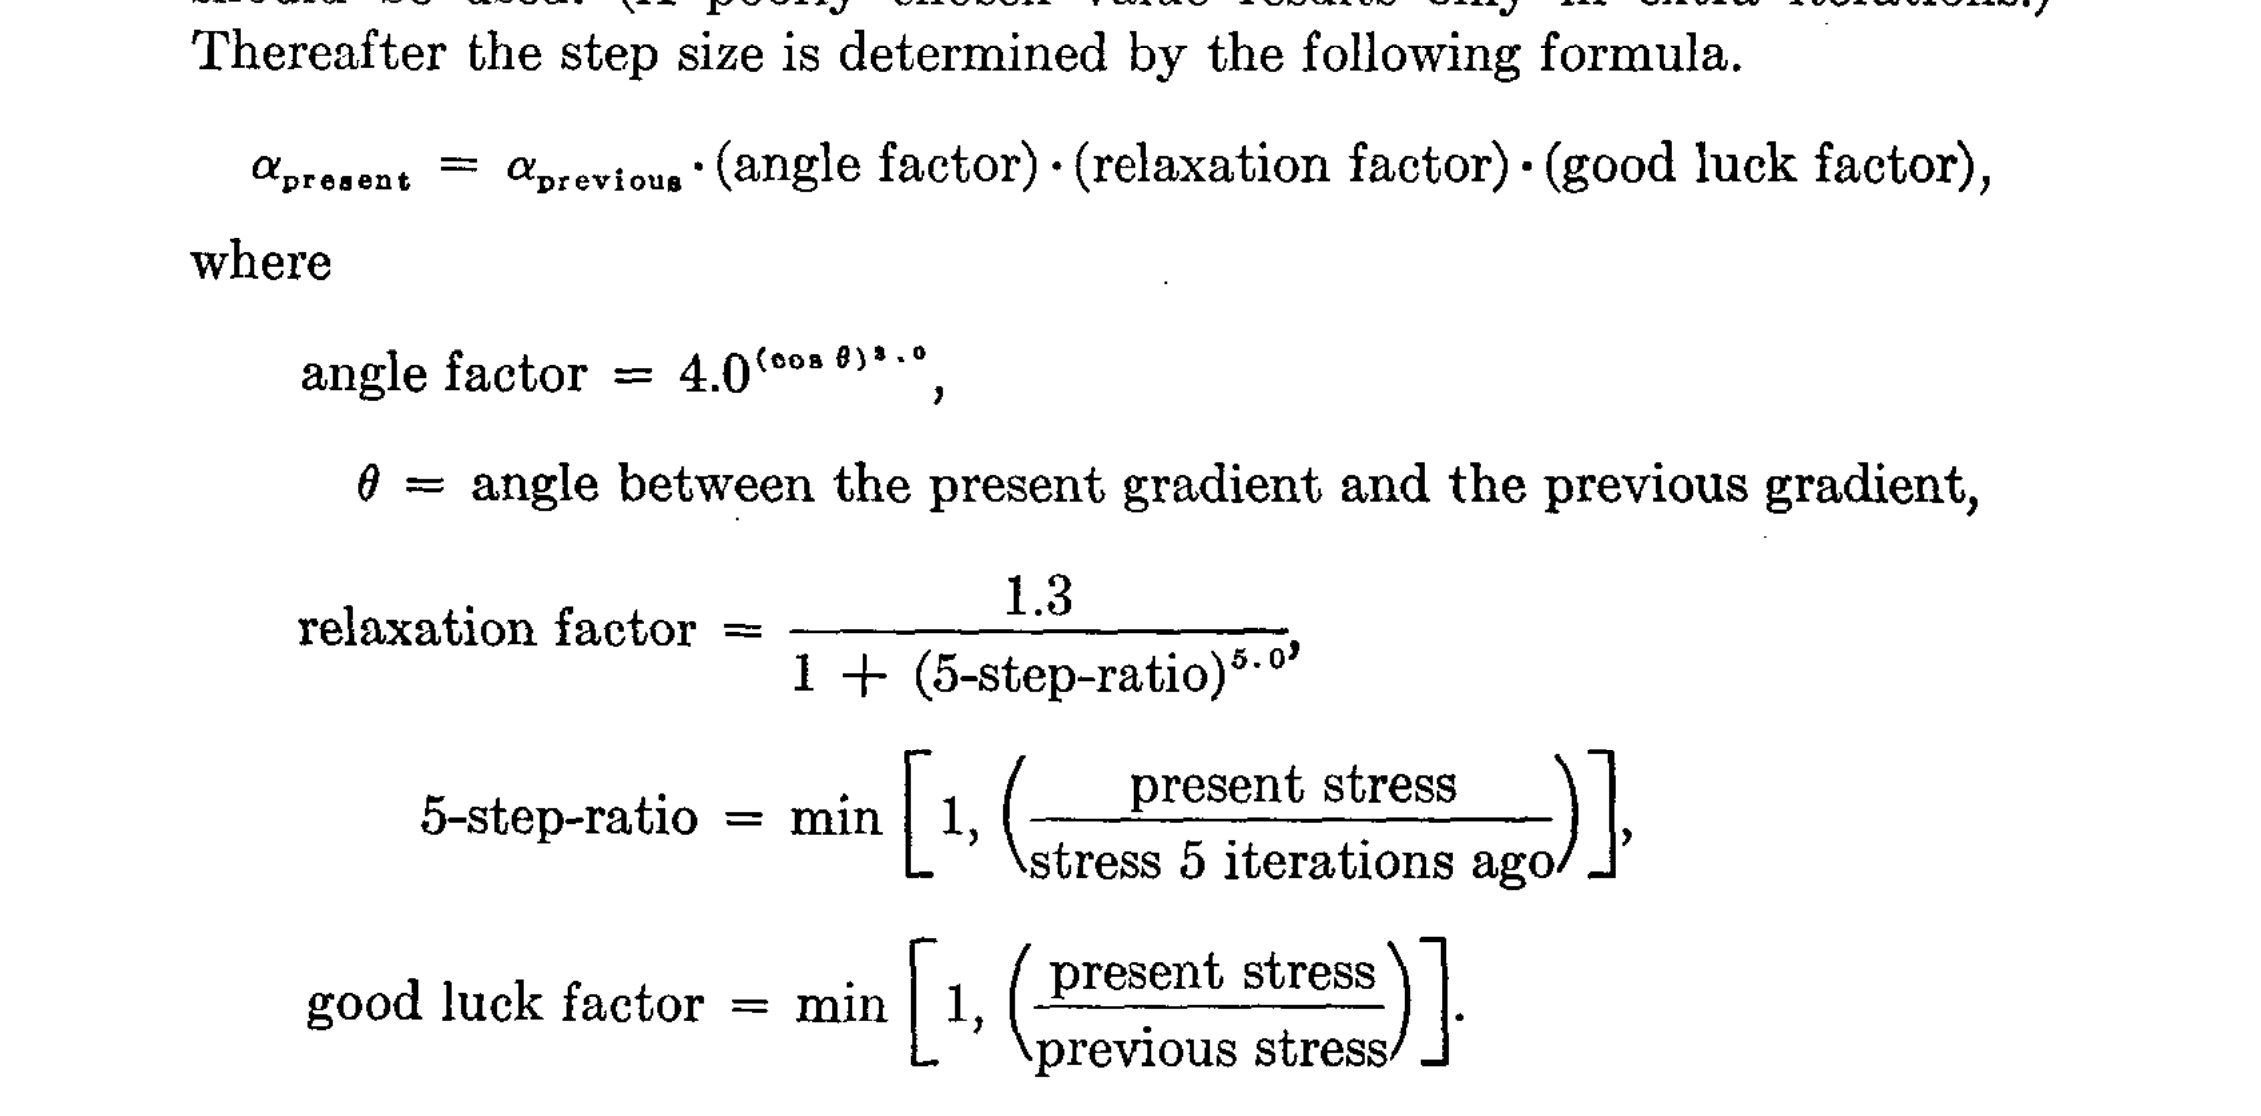
Optimizer from Kruskal, 1964

In [42]:
# todo make doctest for relevant fxs
index = 5
max_rows = 19
fake_dist_vec = np.ones(((max_rows**2 - max_rows)//2, 1))
eye_ref = np.eye(N=max_rows, M = index)
ei_minus_ejs =  eye_ref[:,:-1] - eye_ref[:,-1].reshape(max_rows,1)


In [43]:
test_outer = np.outer(ei_minus_ejs[:,3],ei_minus_ejs[:,3])
test_config = generate_starting_configuration(fake_dist_vec, max_rows)
outer_list = np.apply_along_axis(func1d=self_outer, axis=0, arr=ei_minus_ejs)

In [ ]:
pairwise_dist_over_chunks = [pairwise_dist_block_chunk(outer_list[:,:,k], test_config) for k in range(outer_list.shape[2]) ]


> <ipython-input-34-c0be91997330>(30)pairwise_dist_block_chunk()
-> return tf.linalg.trace(tf.einsum('ij,jk->ik',tf.einsum('ij,jk->ik', tf.transpose(configuration), outer_distance),configuration))
(Pdb) tf.transpose(configuration)
<tf.Tensor: shape=(2, 19), dtype=float64, numpy=
array([[ 1.,  0.,  2.,  0.,  3.,  0.,  4.,  0.,  5.,  0.,  6.,  0.,  7.,
         0.,  8.,  0.,  9.,  0., 10.],
       [ 0.,  1.,  0.,  2.,  0.,  3.,  0.,  4.,  0.,  5.,  0.,  6.,  0.,
         7.,  0.,  8.,  0.,  9.,  0.]])>
(Pdb) outer_distance
array([[ 1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0

In [ ]:
pairwise_dist_over_chunks

In [ ]:
pairwise_dists_of_block(4, test_config)

In [ ]:
np.array_equal(outer_list[:,:,3], np.outer(ei_minus_ejs[:,3],ei_minus_ejs[:,3]))

In [ ]:
len(get_pairwise_distances(test_config))

In [ ]:
len(fake_dist_vec)

In [ ]:
tf_config = tf.convert_to_tensor(test_config)
tf_get_pw_dist(tf_config)

In [ ]:
## Steps 
### Define configuration 
#### for each training iteration
#### normalize 
#### find pairwise distances
#### monotone regression
#### gradient descent



In [ ]:
start_config = generate_starting_configuration(dissimilarity_vec, len(big_matrix.index))


In [ ]:
disty = PDistLayer()

In [ ]:
disty(tf_config)

In [ ]:
Multiply()([tf.ones_like(tf_config), tf_config])

In [ ]:
# plt.scatter(dhat, dissimilarity_vec)
# plt.show()

In [ ]:
# configuration.shape

In [ ]:
# np.mean(configuration,0)

In [ ]:
# configuration

In [ ]:
## Training loop
N_EPOCHS = 20


In [ ]:
# The monotone regression: wrap in function
configuration = deepcopy(start_config)
model = MDSModel(configuration)
model.compile(optimizer='adam', loss=stress)
loss_object = stress

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')

In [ ]:
@tf.function
def train_step(config, dis_vec):
    with tf.GradientTape(persistent=False) as tape:
#         tape.watch(config)
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
        predictions = model([0], training=True)
        print("made predictions")
        loss = loss_object(dis_vec, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    print(gradients)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    return predictions 

In [ ]:
train_step(tf_config, dissimilarity_vec)

In [ ]:
model.trainable_variables


In [ ]:
#looks like gradient loss is messed up by the distance step! What to do next 

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)
for epoch in range(N_EPOCHS):
    # normalize! 
    #TODO: Convert to pure tf
    configuration/=np.linalg.norm(configuration)
    # pairwise dist 
    ### Two options here: 
    #### 1. (suboptimal) use the "canned" formulas for the gradient and just use TF for the monotone regression
    #### 2. write the first layer after the inputs to compute pairwise distances and then to vectorize the lower tri, followed by a couple dense layers 

  # Reset the metrics at the start of the next epoch
    train_loss.reset_states()

    preds = train_step(configuration, dissimilarity_vec)
    
    # Now, apply the gradient of the stress to update the configuration 
    
    
    print(f'Epoch {epoch + 1}, Loss: {train_loss.result()}')
    

In [ ]:
model.summary()

In [ ]:
plt.scatter(dissimilarity_vec, preds)
plt.show()

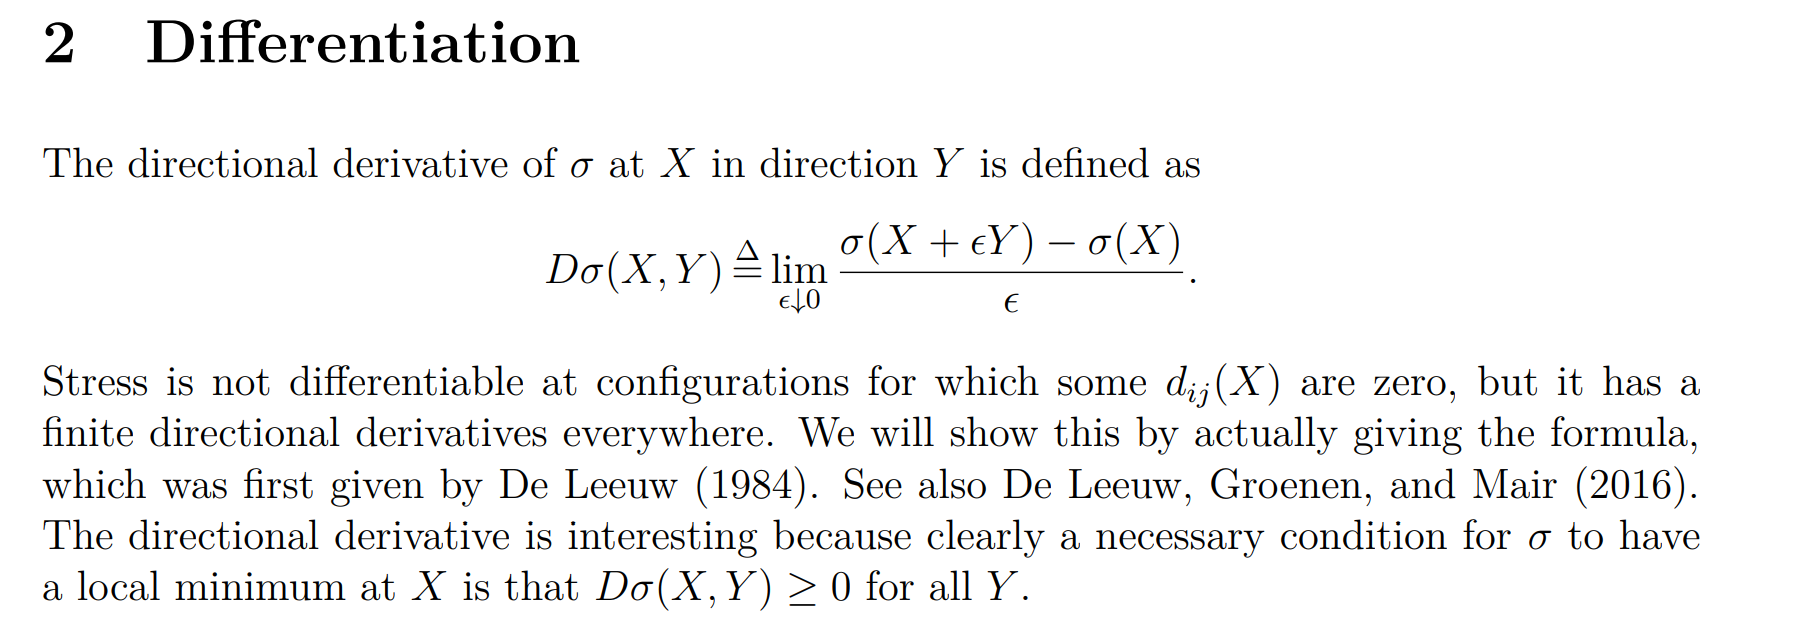
From https://jansweb.netlify.app/publication/deleeuw-e-18-c/

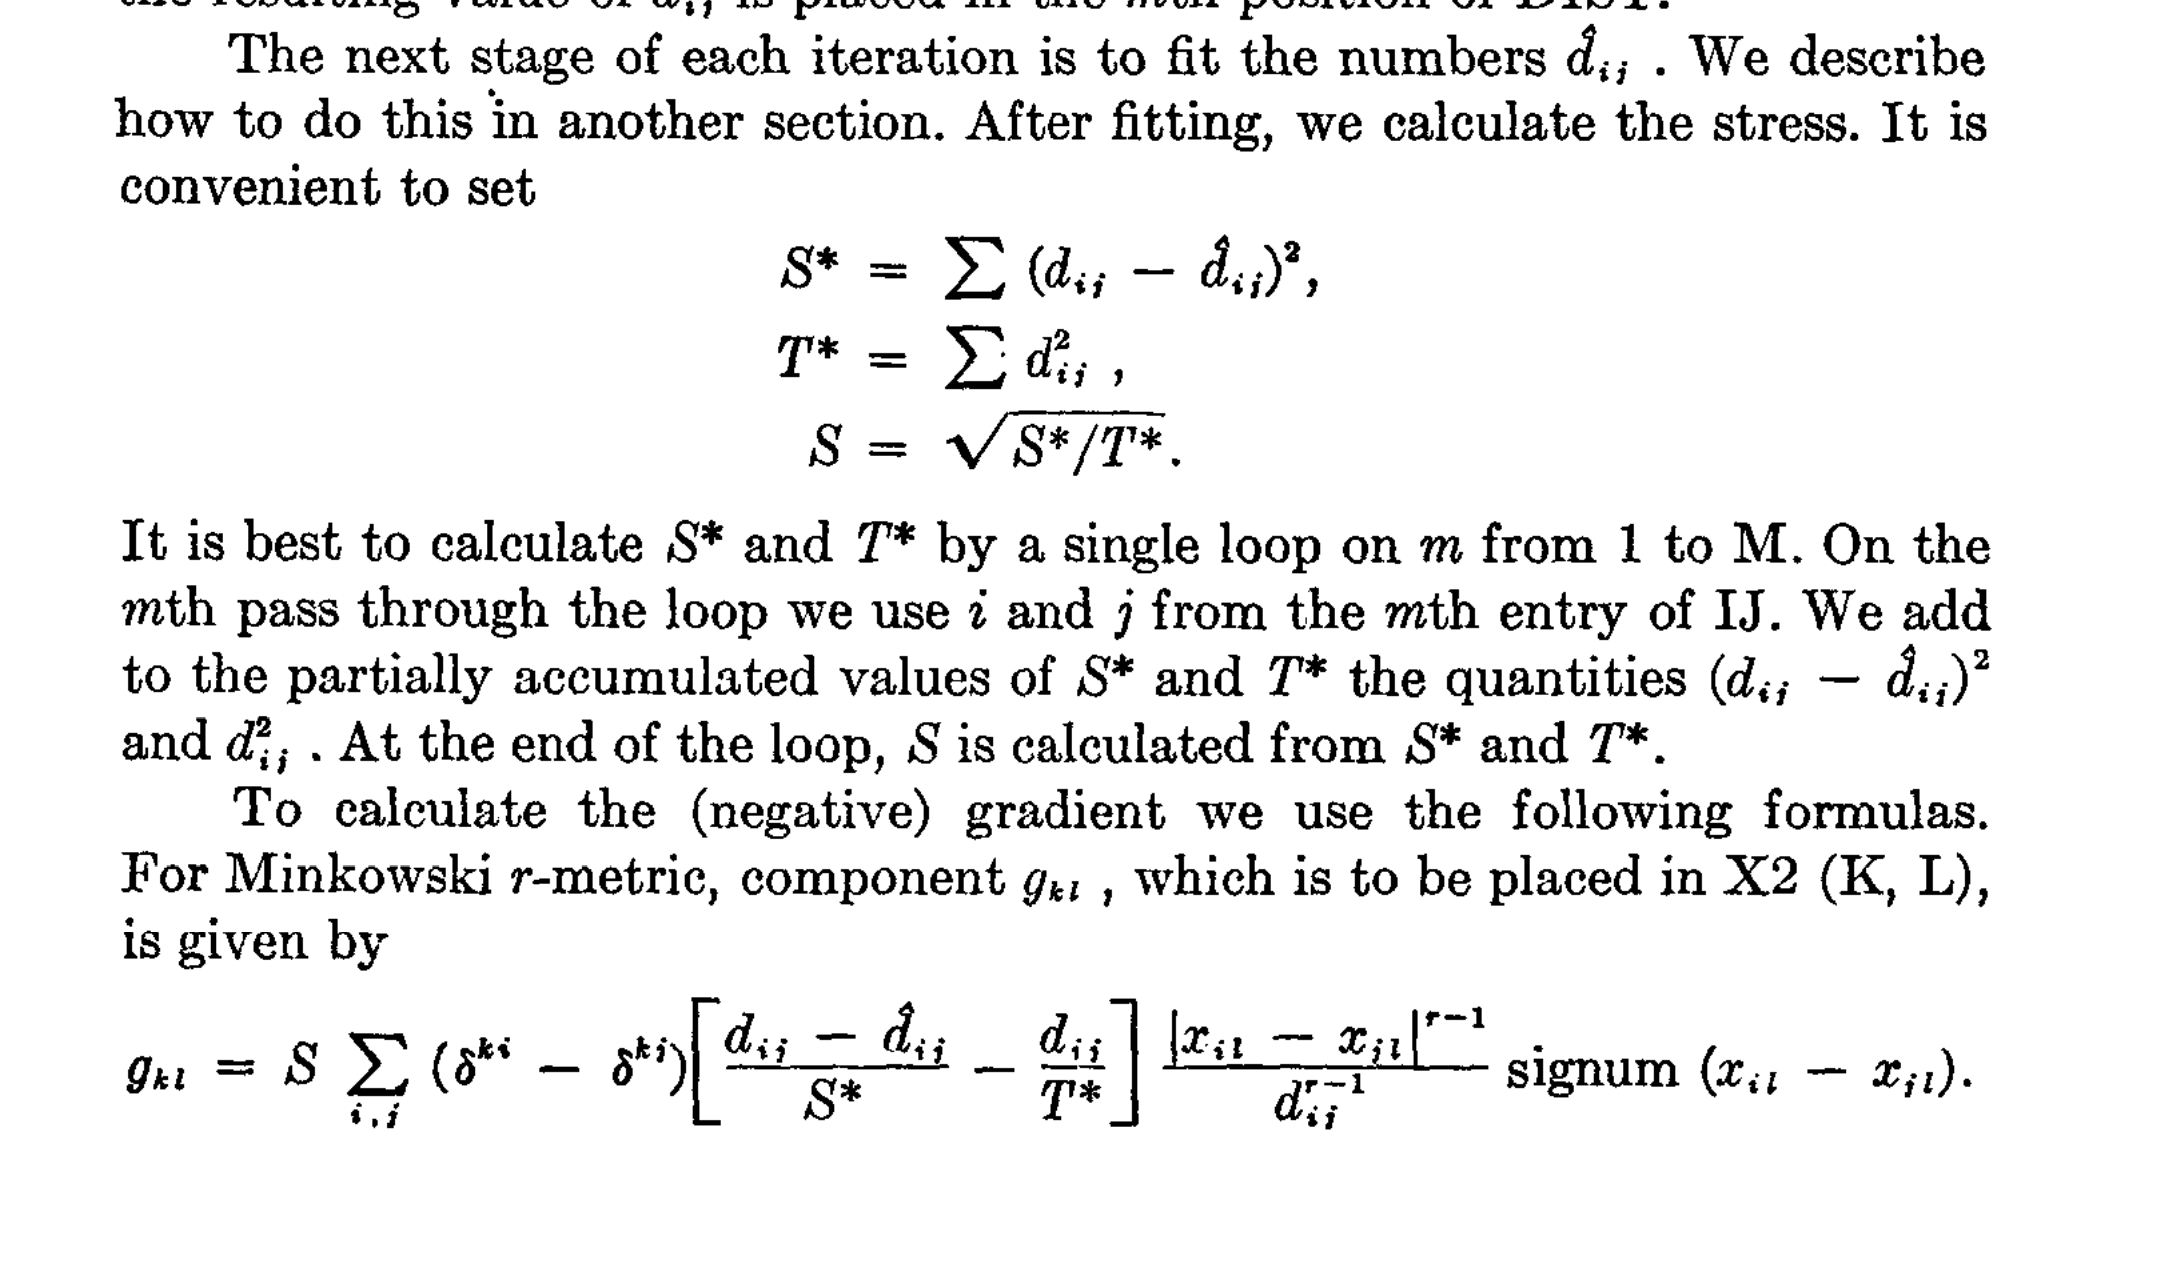
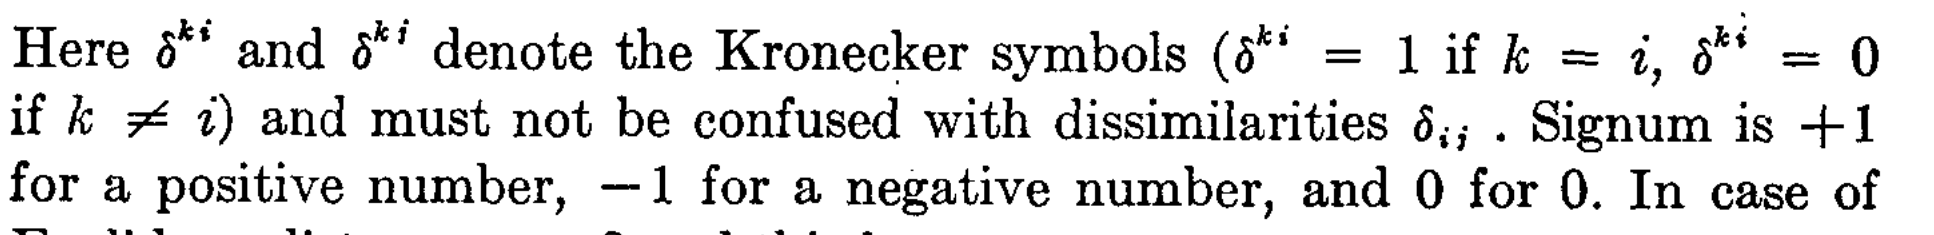
From Kruskal, 1964